## II - Data Preprocessing



In some datasets, there are missing values, outliers, and categorical variables. These issues can affect the performance of the model. Therefore, it is important to preprocess the data before training the model. In this notebook, we will preprocess the data by filling the missing values, encoding the categorical variables, and scaling the features.

### II.1 Importing the Libraries and Loading the Data

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

awards_players = pd.read_csv('../data/basketballPlayoffs/awards_players.csv')
coaches = pd.read_csv('../data/basketballPlayoffs/coaches.csv')
players = pd.read_csv('../data/basketballPlayoffs/players.csv')
players_teams = pd.read_csv('../data/basketballPlayoffs/players_teams.csv')
series_post = pd.read_csv('../data/basketballPlayoffs/series_post.csv')
teams = pd.read_csv('../data/basketballPlayoffs/teams.csv')
teams_post = pd.read_csv('../data/basketballPlayoffs/teams_post.csv')

### II.2 Maping the Categorical Variables

In [44]:
map_teams = {
    'ATL': 0, 'CHA': 1, 'CHI': 2, 'CLE': 3, 'CON': 4, 
    'DET': 5, 'HOU': 6, 'IND': 7, 'LAS': 8, 'MIA': 9, 
    'MIN': 10, 'NYL': 11, 'ORL': 12, 'PHO': 13, 'POR': 14, 
    'SAC': 15, 'SAS': 16, 'SEA': 17, 'UTA': 18, 'WAS': 19
}

map_teams_name = {
    'Atlanta Dream': 0, 'Charlotte Sting': 1, 'Chicago Sky': 2, 
    'Cleveland Rockers': 3, 'Connecticut Sun': 4, 'Detroit Shock': 5, 
    'Houston Comets': 6, 'Indiana Fever': 7, 'Los Angeles Sparks': 8, 
    'Miami Sol': 9, 'Minnesota Lynx': 10, 'New York Liberty': 11, 
    'Orlando Miracle': 12, 'Phoenix Mercury': 13, 'Portland Fire': 14, 
    'Sacramento Monarchs': 15, 'San Antonio Silver Stars': 16, 
    'Seattle Storm': 17, 'Utah Starzz': 18, 'Washington Mystics': 19
}

map_arenas = {
    'Philips Arena': 0, 'Charlotte Coliseum': 1, 'Time Warner Cable Arena': 2, 
    'UIC Pavilion': 3, 'Quicken Loans Arena': 4, 'Mohegan Sun Arena': 5, 
    'The Palace of Auburn Hills': 6, 'Compaq Center': 7, 'Toyota Center': 8, 
    'Conseco Fieldhouse': 9, 'Staples Center': 10, 'AmericanAirlines Arena': 11, 
    'Target Center': 12, 'Madison Square Garden (IV)': 13, 'Amway Arena': 14, 
    'US Airways Center': 15, 'Rose Garden Arena': 16, 'ARCO Arena (II)': 17, 
    'AT&T Center': 18, 'KeyArena at Seattle Center': 19, 
    'EnergySolutions Arena': 20, 'Verizon Center': 21
}

map_awards = {
    'All-Star Game Most Valuable Player': 0,
    'Coach of the Year': 1,
    'Defensive Player of the Year': 2,
    'Kim Perrot Sportsmanship Award': 3,
    'Kim Perrot Sportsmanship': 3,
    'Most Improved Player': 4,
    'Most Valuable Player': 5,
    'Rookie of the Year': 6,
    'Sixth Woman of the Year': 7,
    'WNBA Finals Most Valuable Player': 8,
    'WNBA All-Decade Team': 9,
    'WNBA All Decade Team Honorable Mention': 10
}

### II.3 Plot Functions
Define plot functions to visualize the data.

In [45]:
def plot_missing_values(df, title):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]  
    
    if len(missing_values) > 0:
        plt.figure(figsize=(10, 6))
        missing_values.plot(kind='bar')
        plt.title(f'Missing Values in {title}')
        plt.ylabel('Number of Missing Values')
        plt.xlabel('Columns')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f'No missing values in {title}')

### III.1 Players Data Preprocessing


The Players dataset needs further preprocessing, including dealing with missing values, correcting invalid data, and converting player positions into numerical values.

In [46]:
players['birthDate'] = pd.to_datetime(players['birthDate'], errors='coerce')

players['pos'] = players['pos'].replace({'G-C': 'C-G', 'F-G': 'G-F'})

positions = players['pos'].unique()
map_positions = {pos: i for i, pos in enumerate(positions)}

players['pos'] = players['pos'].map(map_positions)

Drop the columns that are not needed for the analysis.

In [47]:
players_cleaned = players[players['deathDate'] == '0000-00-00'].drop(columns=['deathDate','firstseason','lastseason'])

Check for missing values in the datasets.

In [48]:
print("\nMissing Values in Players:")
print(players_cleaned.isnull().sum())


Missing Values in Players:
bioID             0
pos               0
height            0
weight            0
college         166
collegeOther    878
birthDate        84
dtype: int64


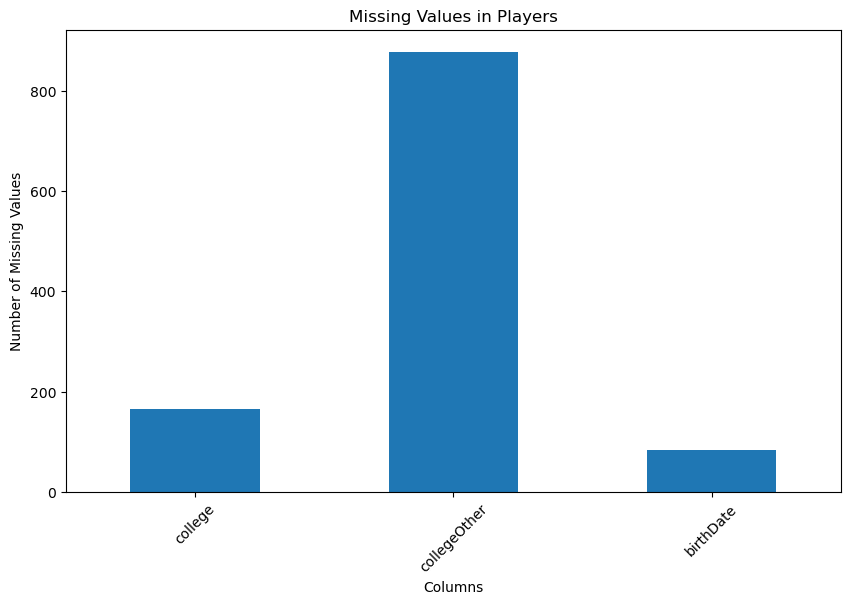

In [49]:
plot_missing_values(players_cleaned, 'Players')

Drop the columns with missing values

In [50]:
players_cleaned = players_cleaned.drop(columns=['collegeOther'])

#Some players that do not have birthdate seem to not appear in the teams_player table. Get those players and check if they exist in player_teams

players_no_birthdate = players_cleaned[players_cleaned['birthDate'].isnull()]

#Make the check in one table the key is playerID and in other is bioID

players_no_birthdate_teams = players_no_birthdate[players_no_birthdate['bioID'].isin(players_teams['playerID'])]

print("\nPlayers with no birthdate that are in the teams_players table:")

print(players_no_birthdate_teams)

# Since thare are no Players with null birthDate present in the player_teams table we can remove them

indices_to_rem = players_no_birthdate.index

players_cleaned = players_cleaned.drop(indices_to_rem)

print(players_cleaned)




Players with no birthdate that are in the teams_players table:
Empty DataFrame
Columns: [bioID, pos, height, weight, college, birthDate]
Index: []
          bioID  pos  height  weight            college  birthDate
0    abrahta01w    0    74.0     190  George Washington 1975-09-27
1    abrossv01w    1    74.0     169        Connecticut 1980-07-09
2    adairje01w    0    76.0     197  George Washington 1986-12-19
3    adamsda01w    2    73.0     239          Texas A&M 1989-02-19
4    adamsjo01w    0    75.0     180         New Mexico 1981-05-24
..          ...  ...     ...     ...                ...        ...
887   zarafr01w    4    70.0     146                NaN 1976-12-08
888  zellosh01w    4    70.0     155         Pittsburgh 1986-08-28
889  zhengha01w    0    80.0     254                NaN 1967-03-07
891  zirkozu01w    4    69.0     145                NaN 1980-06-06
892   zollsh01w    4    67.0     148           Virginia 1986-07-11

[805 rows x 6 columns]
bioID         0
pos     

### III.2 Coaches Data Preprocessing
In the **Coaches** dataset, we apply a similar mapping to team IDs.

In [51]:
coaches['tmID'] = coaches['tmID'].map(map_teams)

Drop the columns that are not needed for the analysis.

In [52]:
coaches_cleaned = coaches.drop(columns=['lgID'])

Check for missing values in the datasets.

In [53]:
print("\nMissing Values in Coaches:")
print(coaches_cleaned.isnull().sum())


Missing Values in Coaches:
coachID        0
year           0
tmID           0
stint          0
won            0
lost           0
post_wins      0
post_losses    0
dtype: int64


### III.3 Teams Data Preprocessing

In the **Teams** dataset, we will map some values (like team names and playoff outcomes) to numerical representations.

In [54]:
#pd.set_option('future.no_silent_downcasting', True)

# Função para substituir valores
def replace_values(df, column, old_values, new_values):
    return df[column].replace(dict(zip(old_values, new_values)))

# Aplicando as correções ao DataFrame 'teams'
teams['firstRound'] = replace_values(teams, 'firstRound', ['L', 'W'], [0, 1])
teams['semis'] = replace_values(teams, 'semis', ['L', 'W'], [0, 1])
teams['finals'] = replace_values(teams, 'finals', ['L', 'W'], [0, 1])
teams['playoff'] = replace_values(teams, 'playoff', ['N', 'Y'], [0, 1])
teams['confID'] = replace_values(teams, 'confID', ['EA', 'WE'], [0, 1])
teams['tmID'] = teams['tmID'].replace(map_teams)
teams['franchID'] = teams['franchID'].replace(map_teams)
teams['name'] = teams['name'].replace(map_teams_name)
teams['arena'] = teams['arena'].replace(map_arenas)

Drop the columns that are not needed for the analysis.

In [55]:
teams_cleaned = teams.drop(columns=['lgID'])

Check for missing values in the datasets.

In [56]:
print("\nMissing Values in Teams:")
print(teams_cleaned.isnull().sum())


Missing Values in Teams:
year            0
tmID            0
franchID        0
confID          0
divID         142
rank            0
playoff         0
seeded          0
firstRound     62
semis         104
finals        122
name            0
o_fgm           0
o_fga           0
o_ftm           0
o_fta           0
o_3pm           0
o_3pa           0
o_oreb          0
o_dreb          0
o_reb           0
o_asts          0
o_pf            0
o_stl           0
o_to            0
o_blk           0
o_pts           0
d_fgm           0
d_fga           0
d_ftm           0
d_fta           0
d_3pm           0
d_3pa           0
d_oreb          0
d_dreb          0
d_reb           0
d_asts          0
d_pf            0
d_stl           0
d_to            0
d_blk           0
d_pts           0
tmORB           0
tmDRB           0
tmTRB           0
opptmORB        0
opptmDRB        0
opptmTRB        0
won             0
lost            0
GP              0
homeW           0
homeL           0
awayW           0
aw

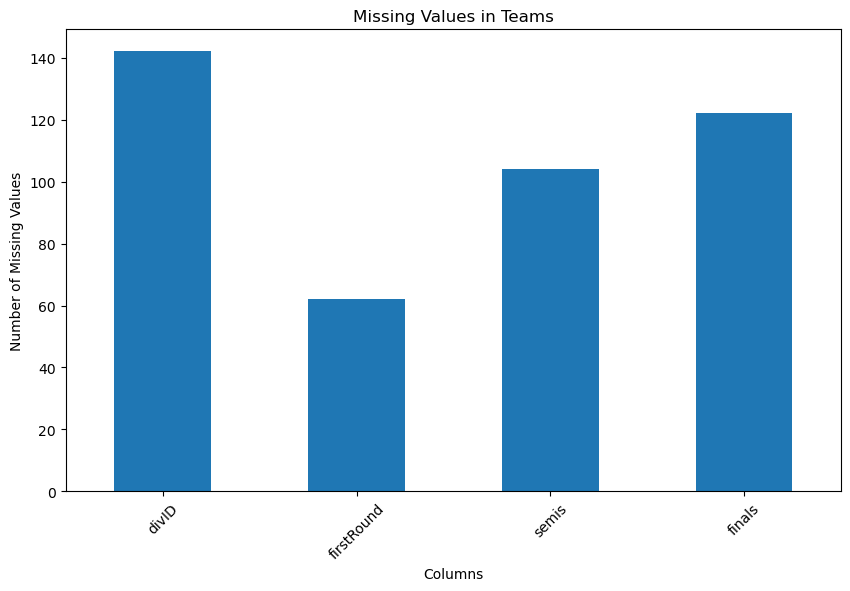

In [57]:
plot_missing_values(teams_cleaned, 'Teams')


Drop the columns with missing values

In [58]:
teams_cleaned.drop(columns=['franchID','divID'])

#Assuming that the missing values in firstRound, semis and finals represent that the team didn't reach that stage we will replace all the missing values by the number 2
teams_cleaned['firstRound'] = teams_cleaned['firstRound'].fillna(2)
teams_cleaned['semis'] = teams_cleaned['semis'].fillna(2)
teams_cleaned['finals'] = teams_cleaned['finals'].fillna(2)

### III.4 Players Teams Data Preprocessing

In the **Players Teams** dataset, we will map some values (like team names) to numerical representations.

In [59]:
players_teams['tmID'] = players_teams['tmID'].map(map_teams)

Drop the columns that are not needed for the analysis.

In [60]:
players_teams_cleaned = players_teams.drop(columns=['lgID'])

Check for missing values in the datasets.

In [61]:
print("\nMissing Values in Players Teams:")
print(players_teams_cleaned.isnull().sum())


Missing Values in Players Teams:
playerID              0
year                  0
stint                 0
tmID                  0
GP                    0
GS                    0
minutes               0
points                0
oRebounds             0
dRebounds             0
rebounds              0
assists               0
steals                0
blocks                0
turnovers             0
PF                    0
fgAttempted           0
fgMade                0
ftAttempted           0
ftMade                0
threeAttempted        0
threeMade             0
dq                    0
PostGP                0
PostGS                0
PostMinutes           0
PostPoints            0
PostoRebounds         0
PostdRebounds         0
PostRebounds          0
PostAssists           0
PostSteals            0
PostBlocks            0
PostTurnovers         0
PostPF                0
PostfgAttempted       0
PostfgMade            0
PostftAttempted       0
PostftMade            0
PostthreeAttempted    0
Postth

### III.5 Player Awards Data Preprocessing

In the **Awards Players** dataset, we will map some values (like team names) to numerical representations.

In [62]:
awards_players['award'].replace(map_awards, inplace=True)

Drop the columns that are not needed for the analysis.

In [63]:
awards_players_cleaned = awards_players.drop(columns=['lgID'])

Check for missing values in the dataset.

In [64]:
print("Missing Values in Awards Players:")
print(awards_players_cleaned.isnull().sum())

Missing Values in Awards Players:
playerID    0
award       0
year        0
dtype: int64


### III.6 Series Post Data Preprocessing
In the **Series Post** dataset, we will map some values (like playoff outcomes) to numerical representations.

In [65]:
series_post['tmIDWinner'] = series_post['tmIDWinner'].map(map_teams)
series_post['tmIDLoser'] = series_post['tmIDLoser'].map(map_teams)

Drop the columns that are not needed for the analysis.

In [66]:
series_post_cleaned = series_post.drop(columns=['lgIDWinner','lgIDLoser'])

Check for missing values in the datasets.

In [67]:
print("\nMissing Values in Series Post:")
print(series_post_cleaned.isnull().sum())


Missing Values in Series Post:
year          0
round         0
series        0
tmIDWinner    0
tmIDLoser     0
W             0
L             0
dtype: int64


### III.7 Teams Post Data Preprocessing
In the **Teams Post** dataset, we will map some values (like playoff outcomes) to numerical representations.

In [68]:
teams_post['tmID'] = teams_post['tmID'].map(map_teams)

Drop the columns that are not needed for the analysis.

In [69]:
teams_post_cleaned = teams_post.drop(columns=['lgID'])

Check for missing values in the datasets.

In [70]:
print("\nMissing Values in Teams Post:")
print(teams_post_cleaned.isnull().sum())


Missing Values in Teams Post:
year    0
tmID    0
W       0
L       0
dtype: int64


### Creating Output Directory

In [71]:
os.makedirs('../data/basketballPlayoffs_cleaned', exist_ok=True)

### Exporting Cleaned DataFrames to new CSV files

In [72]:
awards_players_cleaned.to_csv('../data/basketballPlayoffs_cleaned/awards_players_cleaned.csv', index=False)
coaches_cleaned.to_csv('../data/basketballPlayoffs_cleaned/coaches_cleaned.csv', index=False)
players_teams_cleaned.to_csv('../data/basketballPlayoffs_cleaned/players_teams_cleaned.csv', index=False)
players_cleaned.to_csv('../data/basketballPlayoffs_cleaned/players_cleaned.csv', index=False)
series_post_cleaned.to_csv('../data/basketballPlayoffs_cleaned/series_post_cleaned.csv', index=False)
teams_post_cleaned.to_csv('../data/basketballPlayoffs_cleaned/teams_post_cleaned.csv', index=False)
teams_cleaned.to_csv('../data/basketballPlayoffs_cleaned/teams_cleaned.csv', index=False)